AIT580 
Assignment 8
Aleah Langrell and Floyd Steele

In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import statistics
import seaborn as sns

Task2 2.1.1 Remove all the leading and trailing spaces in the data


In [4]:
data = pd.read_csv('/Users/aleahlangrell/Downloads/cars_messy(1).csv')

In [5]:
df = pd.read_csv('/Users/aleahlangrell/Downloads/cars_messy(1).csv')

In [6]:
df.columns = df.columns.str.strip()

In [7]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin,DoorNum
0,Chevrolet Chevelle Malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,US,NaN
1,Buick Skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,US,NaN
2,Plymouth Satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,US,NaN
3,AMC Rebel SST,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,US,NaN
4,Ford Torino,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,US,NaN


2.1.2 Check to see if there are duplicates.  If so, remove them.

In [9]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
400    False
401    False
402    False
403    False
404    False
Length: 405, dtype: bool

In [10]:
df = df.drop_duplicates()

In [11]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
400    False
401    False
402    False
403    False
404    False
Length: 404, dtype: bool

2.2 Handling missing values.    

2.2.1 Display the null/missing values

In [13]:
df.isnull().sum()

Car               0
MPG               4
Cylinders         2
Displacement      7
Horsepower        4
Weight            5
Acceleration      6
Model             2
Origin            1
DoorNum         401
dtype: int64

In [14]:
count_nan = df.isnull().sum()
print(count_nan[count_nan>0])

MPG               4
Cylinders         2
Displacement      7
Horsepower        4
Weight            5
Acceleration      6
Model             2
Origin            1
DoorNum         401
dtype: int64


2.2.2 Drop columns with 90% or more null values.

In [16]:
df = df.drop(['DoorNum'], axis=1)

In [17]:
df.head()

,Car,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model,Origin
0,Chevrolet Chevelle Malibu,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,US
1,Buick Skylark 320,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,US
2,Plymouth Satellite,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,US
3,AMC Rebel SST,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,US
4,Ford Torino,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,US


2.2.3 Explore the data with visualization.

2.2.3.1 Draw two plots for Horsepower vs Cylinders and Displacement vs Cylinders.

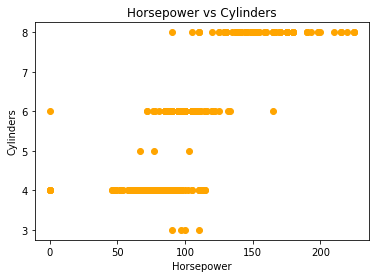

In [19]:
plt.xlabel('Horsepower')
plt.ylabel('Cylinders')
plt.title('Horsepower vs Cylinders')
plt.scatter(df['Horsepower'], df['Cylinders'], color = 'orange')

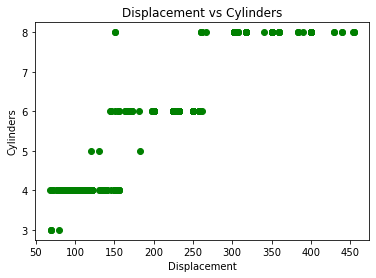

In [38]:
plt.xlabel('Displacement')
plt.ylabel('Cylinders')
plt.title('Displacement vs Cylinders')
plt.scatter(df['Displacement'], df['Cylinders'], color = 'green')

2.2.3.2 Plot a grouped bar chart for Displacement, Acceleration, MPG, and Horsepower grouped by Cylinders.

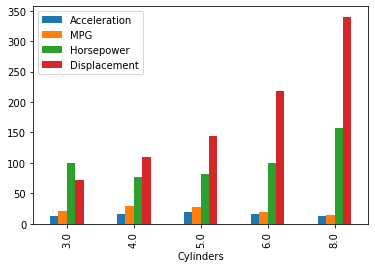

In [36]:
df[['Acceleration','MPG','Horsepower','Displacement','Cylinders']].groupby(['Cylinders']).mean().plot.bar();

2.2.3.3 What can you find from above two charts to better impute the different features missing values? 
Do you have any solutions for each of them and why? Please briefly explain in the code in the notebook.

In [79]:
#The above graphs show that there are few cars with 3 and 5 cylinder engines. There really isn't much missing data. There are better ways to impute the missing values other than assuming the mean of variables.  

2.2.2.4 Impute all the missing values with median.

In [45]:
df = df.fillna(df.median())

In [46]:
count_nan = df.isnull().sum()
print(count_nan[count_nan>0])

Origin    1
dtype: int64


2.3 Handling Outliers

2.3.1 Draw boxplots in one figure to identify the features and columns that have outliers.

<AxesSubplot:>

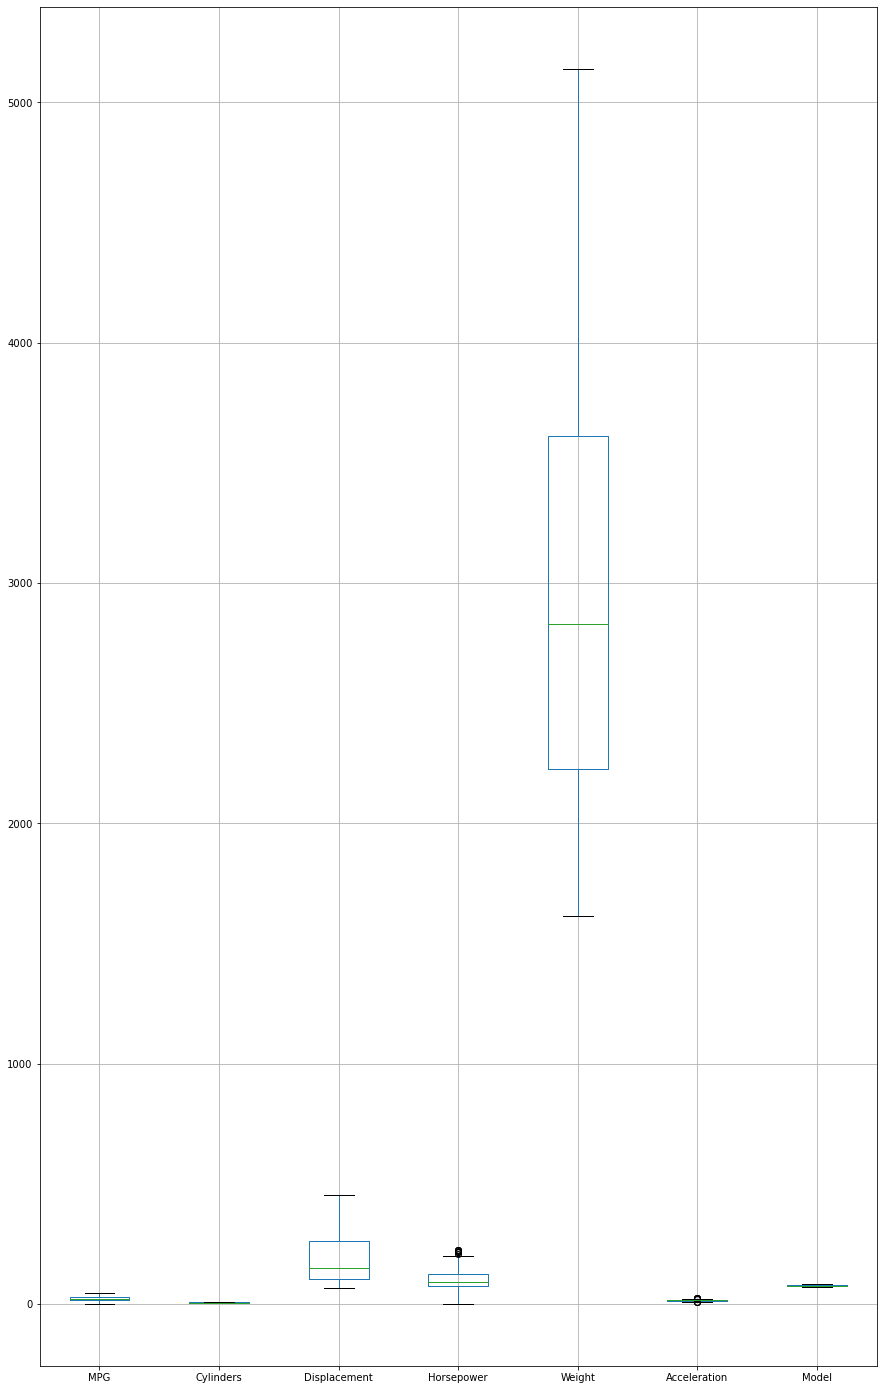

In [44]:
df.boxplot(figsize=(15,25))

2.3.2 Draw boxplots in one figure only containing outliers.

<AxesSubplot:>

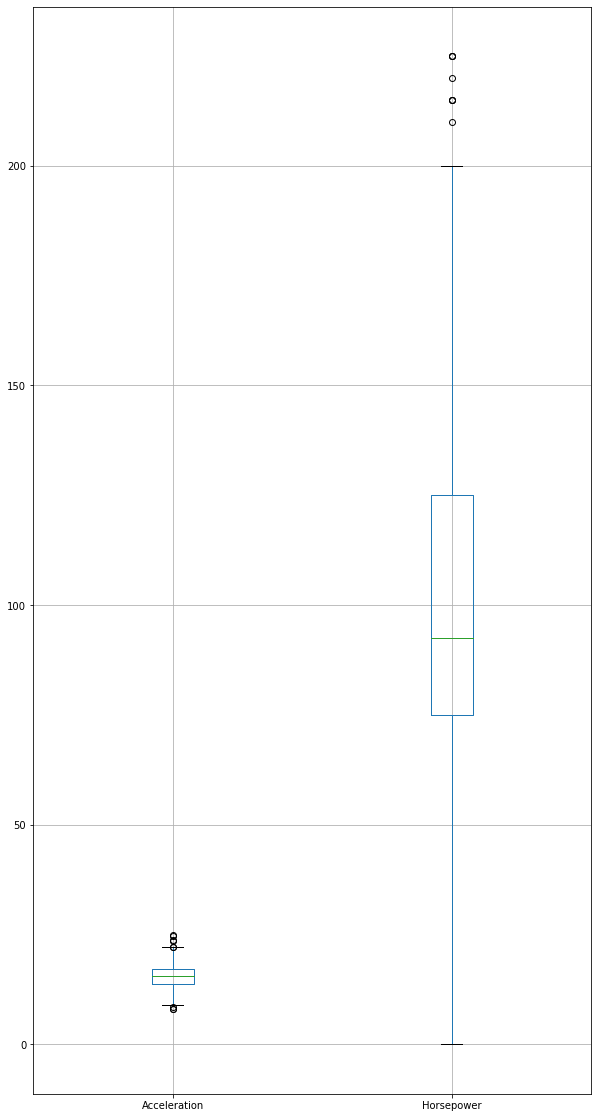

In [49]:
AccHPdata = df[['Acceleration', 'Horsepower']]
AccHPdata.boxplot(figsize =(10,20))


2.3.3 Come up with one approach to discard outliers and implement it. 


In [52]:
from scipy import stats

df = df[np.abs(stats.zscore(df[['Acceleration','Horsepower']])) <= 3]


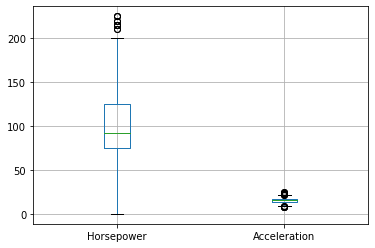

In [53]:
df[['Horsepower','Acceleration']].boxplot();

2.4 Visualization for Data Analysis

2.4.1 Draw multiple histograms for all numerical attributes. What can you find? Please clearly explain in notebook. 

(array([ 12.,  29., 102., 170., 194., 160.,  88.,  28.,  14.,   6.]),
 array([ 8.  ,  9.68, 11.36, 13.04, 14.72, 16.4 , 18.08, 19.76, 21.44,
        23.12, 24.8 ]),
 <BarContainer object of 10 artists>)

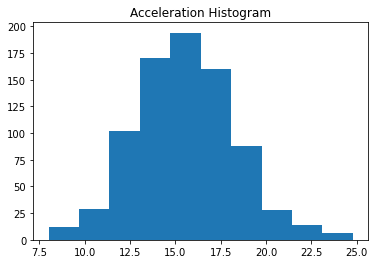

In [54]:
plt.title('Acceleration Histogram')
plt.hist(df['Acceleration'])

Text(0.5, 1.0, 'Acceleration Histogram')

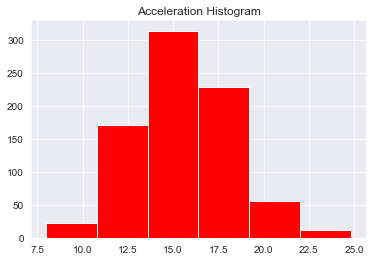

In [55]:
sns.set_style('dark')
df['Acceleration'].hist(bins=6, color = 'red')
plt.title('Acceleration Histogram')

The histograms for Acceleration above show the distribution of the data or the frequency of where the Acceleration data lie.  From the histograms above, we can see that more data fall around the value of 15.0, followed by 17.5 and 12.5.  We can also see that the acceleration has a seemingly normal distribution.

(array([  8.,   0., 412.,   0.,   6.,   0., 168.,   0.,   0., 209.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <BarContainer object of 10 artists>)

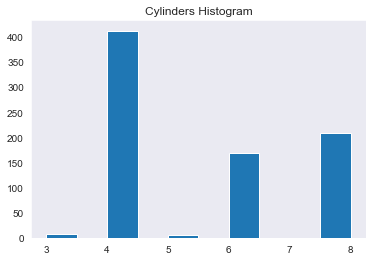

In [56]:
plt.title('Cylinders Histogram')
plt.hist(df['Cylinders'])

Text(0.5, 1.0, 'Cylinders Histogram')

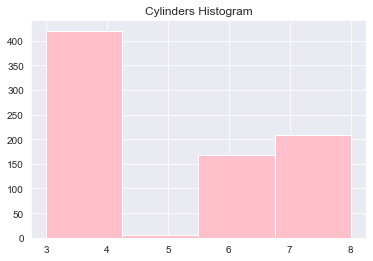

In [57]:
sns.set_style('dark')
df['Cylinders'].hist(bins=4, color = 'pink')
plt.title('Cylinders Histogram')

The histograms above show that there are more than others, but since the bin size was changed the interpretation of each of the graphs are a little different.  The second pink histogram shows that the most cyclinders are 3 and 4, but taking a closer look at the first cylinders histogram with more bins (resulting in more bars) shows that there are very few 3 cylinders but more 4 cylinders than any other cylinder.

(array([213., 175.,  76.,  24., 114.,   6.,  84.,  68.,  30.,  13.]),
 array([ 68. , 106.7, 145.4, 184.1, 222.8, 261.5, 300.2, 338.9, 377.6,
        416.3, 455. ]),
 <BarContainer object of 10 artists>)

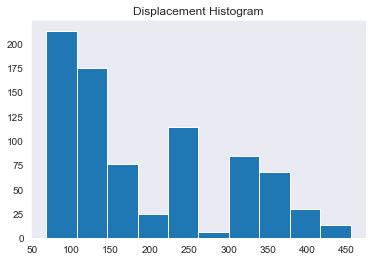

In [58]:
plt.title('Displacement Histogram')
plt.hist(df['Displacement'])

Text(0.5, 1.0, 'Displacement Histogram')

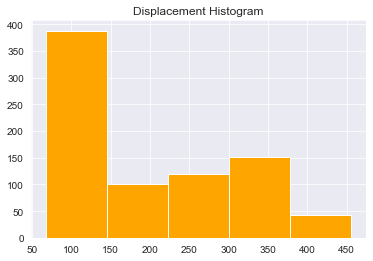

In [59]:
sns.set_style('dark')
df['Displacement'].hist(bins=5, color = 'orange')
plt.title('Displacement Histogram')

From the first displacement histogram, we can clearly see that some values contain very few data from displacement.  The more bins that we see, the more precise our interpretation of where the data falls. 

(array([126.,  56.,  77.,  54.,  58., 128.,  70.,  57.,  56., 121.]),
 array([70. , 71.2, 72.4, 73.6, 74.8, 76. , 77.2, 78.4, 79.6, 80.8, 82. ]),
 <BarContainer object of 10 artists>)

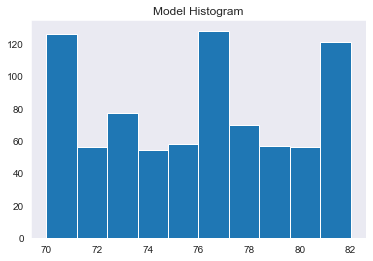

In [60]:
plt.title('Model Histogram')
plt.hist(df['Model'])

Text(0.5, 1.0, 'Model Histogram')

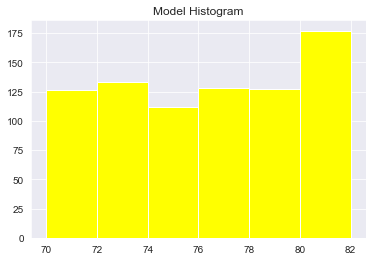

In [61]:
sns.set_style('dark')
df['Model'].hist(bins=6, color = 'yellow')
plt.title('Model Histogram')

Text(0.5, 1.0, 'Model Histogram')

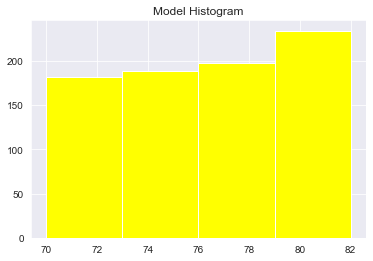

In [62]:
sns.set_style('dark')
df['Model'].hist(bins=4, color = 'yellow')
plt.title('Model Histogram')

As the model histograms above progress having fewer and fewer bins, the data appears to be more evenly distributed, but the first blue histogram shows that there are certain models that occur almost twice as much as other models.

(array([ 16.,   2.,  61., 190., 162., 141., 118.,  76.,  26.,  11.]),
 array([ 0.  ,  4.66,  9.32, 13.98, 18.64, 23.3 , 27.96, 32.62, 37.28,
        41.94, 46.6 ]),
 <BarContainer object of 10 artists>)

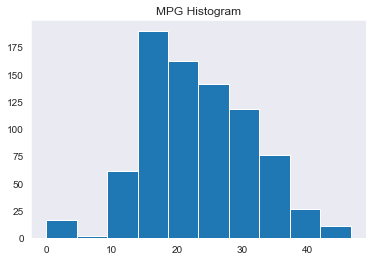

In [63]:
plt.title('MPG Histogram')
plt.hist(df['MPG'])

Text(0.5, 1.0, 'MPG Histogram')

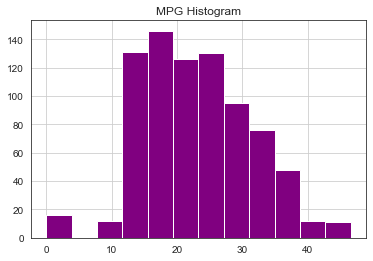

In [64]:
sns.set_style('white')
df['MPG'].hist(bins=12, color = 'purple')
plt.title('MPG Histogram')

Text(0.5, 1.0, 'MPG Histogram')

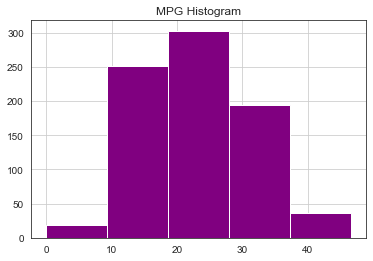

In [65]:
sns.set_style('white')
df['MPG'].hist(bins=5, color = 'purple')
plt.title('MPG Histogram')

The last MPG histogram almost appears to have a normal distribution, but the first histogram shows that MPGs between 15 and 20 occur more than any other group of MPG in the dataset. 

(array([ 12.,   0., 101., 235., 228.,  48., 100.,  42.,  24.,  13.]),
 array([  0. ,  22.5,  45. ,  67.5,  90. , 112.5, 135. , 157.5, 180. ,
        202.5, 225. ]),
 <BarContainer object of 10 artists>)

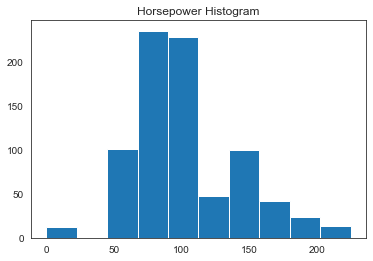

In [66]:
plt.title('Horsepower Histogram')
plt.hist(df['Horsepower'])

Text(0.5, 1.0, 'Horsepower Histogram')

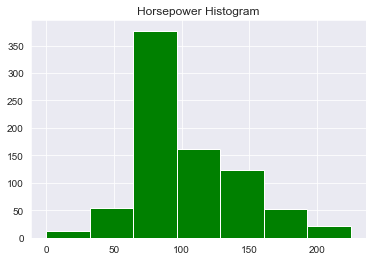

In [67]:
sns.set_style('dark')
df['Horsepower'].hist(bins=7, color = 'green')
plt.title('Horsepower Histogram')

Text(0.5, 1.0, 'Horsepower Histogram')

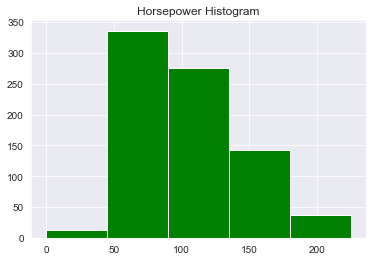

In [68]:
sns.set_style('dark')
df['Horsepower'].hist(bins=5, color = 'green')
plt.title('Horsepower Histogram')

The difference in the amount of bins for horsepower made less of a difference than some of the other variables, and it is clear that horsepower from 50-100 occurs most, followed by higher horsepowers in descending order.



(array([ 60., 179., 116., 118.,  74.,  80.,  62.,  69.,  34.,  11.]),
 array([1613. , 1965.7, 2318.4, 2671.1, 3023.8, 3376.5, 3729.2, 4081.9,
        4434.6, 4787.3, 5140. ]),
 <BarContainer object of 10 artists>)

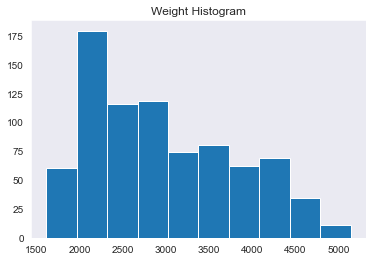

In [69]:
plt.title('Weight Histogram')
plt.hist(df['Weight'])

Text(0.5, 1.0, 'Weight Histogram')

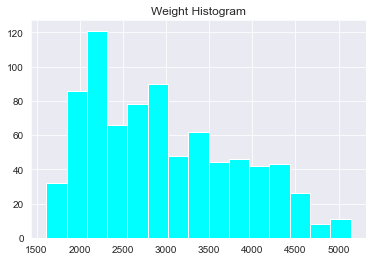

In [70]:
sns.set_style('dark')
df['Weight'].hist(bins=15, color = 'cyan')
plt.title('Weight Histogram')

Text(0.5, 1.0, 'Weight Histogram')

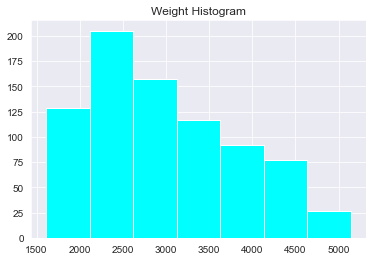

In [71]:
sns.set_style('dark')
df['Weight'].hist(bins=7, color = 'cyan')
plt.title('Weight Histogram')


Text(0.5, 1.0, 'Weight Histogram')

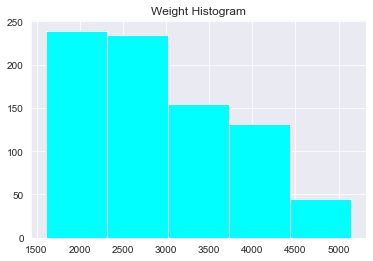

In [72]:
sns.set_style('dark')
df['Weight'].hist(bins=5, color = 'cyan')
plt.title('Weight Histogram')

Text(0.5, 1.0, 'Weight Histogram')

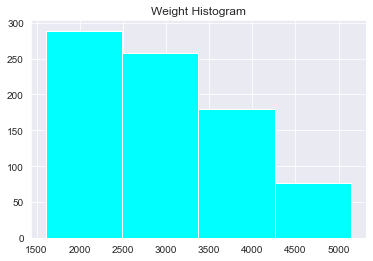

In [73]:
sns.set_style('dark')
df['Weight'].hist(bins=4, color = 'cyan')
plt.title('Weight Histogram')

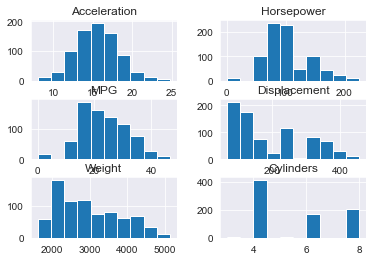

In [74]:
df[['Acceleration','Horsepower','MPG','Displacement','Weight','Cylinders']].hist();

The weight histograms above really show that even if data appears to fall into categories without many high or low spikes in the frequencies, adding more bins can usually show peaks a little better than histograms with less bins.

From the histograms we can see how the different amount of bins affects the histogram and distribution of the data points.  The more bins that there are, the more that you can see the distribution of data points, but when there are fewer bins, it may be easier to categorize or classify data.  Histograms show us the frequency of variables in the dataset, so the bars that are the highest are the bins or categories of data that occur most within that variable.  

The above histograms show us that the data are mostly normally distributed with some variables demonstrating positive skew. Cylinders is a categorical variable.


2.4.2 Calculate and draw a correlation matrix. What can you find? Explain.

Text(0.5, 1.0, 'Correlations')

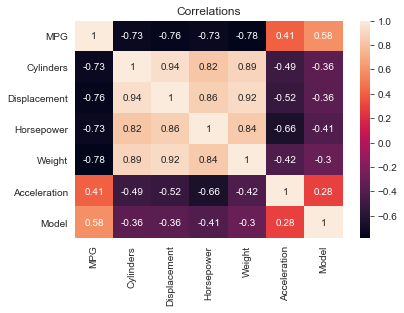

In [76]:
corrvals = df.corr()
sns.heatmap(corrvals, annot=True)
plt.title('Correlations')

We see that variables are perfectly positively correlated with themselves (found by value of 1).  We also can see that cyliders and displacement have a strong positive correlation, horsepower and cylinders have a strong positive correlation, weight and cyclinders have a strong positive correlation, horsepower and displacement have strong positive correlations, and displacement and weight have strong positive correlations.  MPG has fairly strong negative correlations with cylinders, displacement, horsepower, and weight, but MPG has a medium positive correlation with acceleration and model.  Acceleration has a mild negative correlation with cylinders, displacement, horsepower, and weight, but small positive correlations with Model and a mild positive correlation with MPG.  The modelvariable is mildly negatively correlated with cylinders, displacement, horsepower, and weight. Values that are closer to -1 or 1 and further from 0, are considered to be stronger correlations between variables. 



2.4.3 Draw a scatter matrix. What can you find? Clearly Explain.


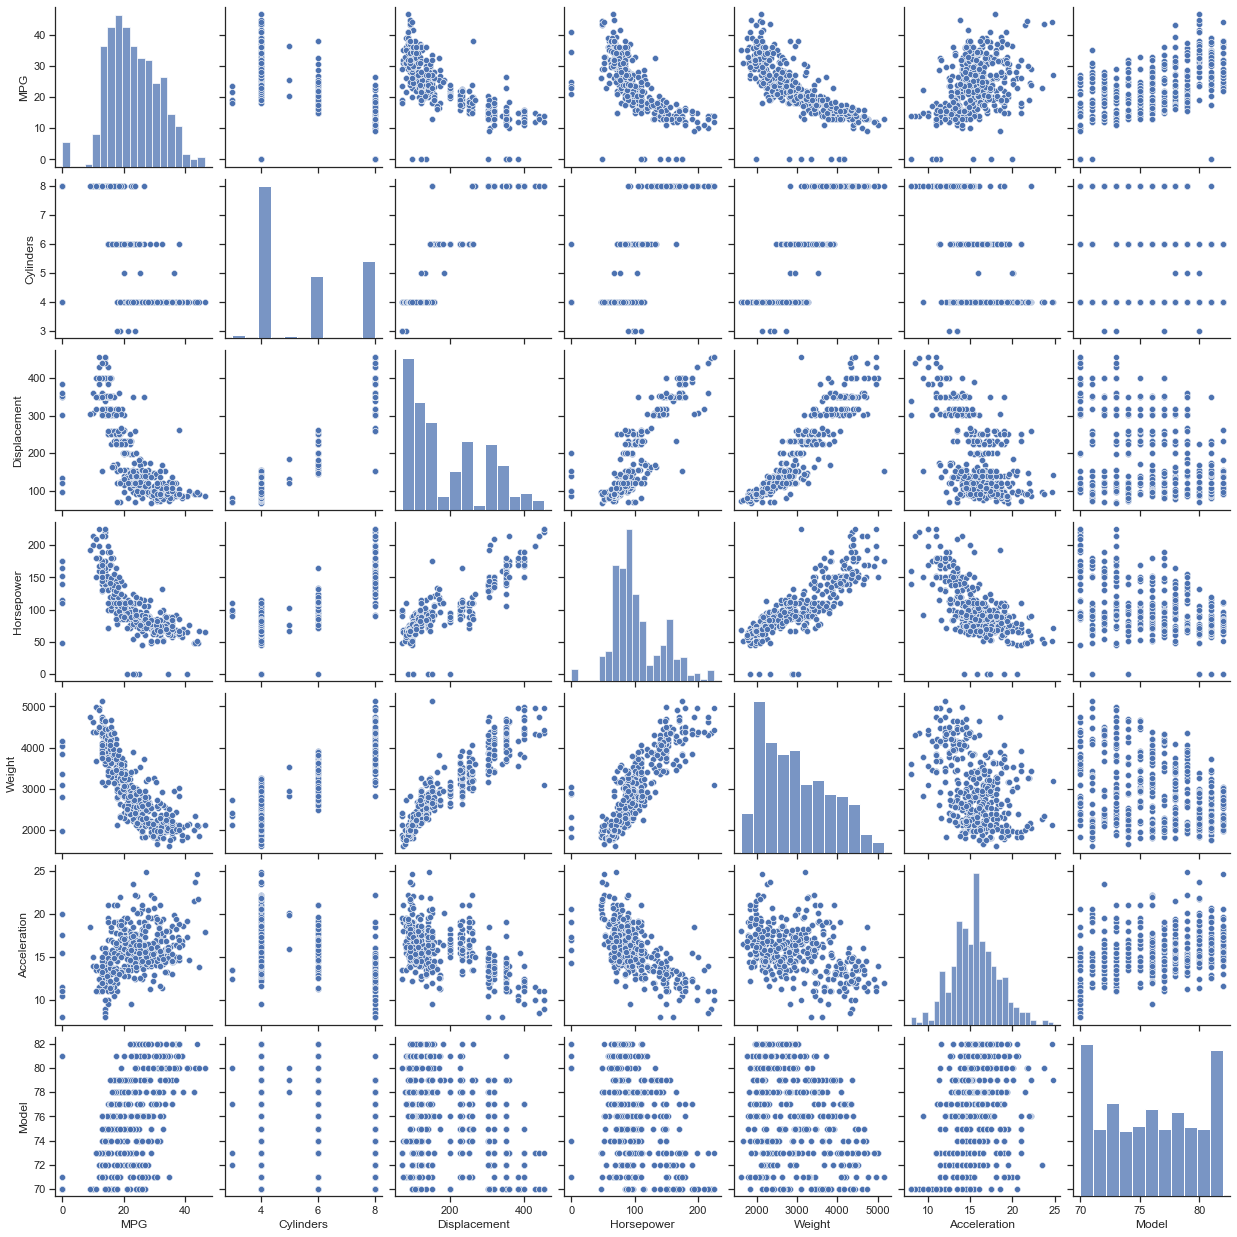

In [77]:
sns.set_theme(style="ticks")
sns.pairplot(df);

alternative way

array([[<AxesSubplot:xlabel='MPG', ylabel='MPG'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='MPG'>,
        <AxesSubplot:xlabel='Displacement', ylabel='MPG'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='MPG'>,
        <AxesSubplot:xlabel='Weight', ylabel='MPG'>,
        <AxesSubplot:xlabel='Acceleration', ylabel='MPG'>,
        <AxesSubplot:xlabel='Model', ylabel='MPG'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Horsepower', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Weight', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Acceleration', ylabel='Cylinders'>,
        <AxesSubplot:xlabel='Model', ylabel='Cylinders'>],
       [<AxesSubplot:xlabel='MPG', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Cylinders', ylabel='Displacement'>,
        <AxesSubplot:xlabel='Displacement', ylabel='Displace

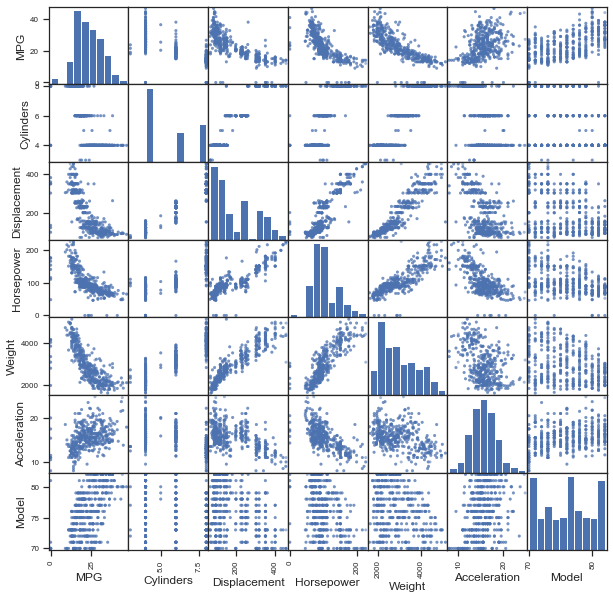

In [78]:
pd.plotting.scatter_matrix(df, figsize=(10,10))

the scatter matrices above, show us different charts of paired variables which is really handy when trying to visualize which variables may affect another and can be a good start on deciding which visuals are most useful for displaying the dataset AND findings.

2.5 Program Robust Checking

In [ ]:
#what to do here?

In [ ]:
#3.1 What lessons have you learnt from implementing task 2?

In [ ]:
#answer

In [ ]:
#3.2 Many organizations are implementing data-governance boards. Describe the purpose of a data governance board. Then, list five to eight tasks the board should perform.

In [ ]:
#The purpose of a data governance board is a board in the center (the middle level for large companies but this can vary depending on company size and data governance architecture) of the data governance pyramid comprised of roles such as data governors or data owners, decides how to develop, update or implement standards for data quality, security and making sure that policies are implemented at a company wide level with comprehension from all (Plotkin, 2014).  

#Best Practices for Data Governance Board:
#1.The board should make sure that policies and standards are clearly communicated with the whole company and stakeholders to ensure transparency, comprehension and accountability.
#2. The board should make sure that the business goal is clearly understood, and that the goal is achieved with sustainable methods.
#3. The board should identify roles and clearly define roles and expectations from roles, and plan jobs and duedates for each role and task.
#4. The board should ensure that goals, policies and standards are measureable in some way to measure the successes or failures, which should be regularly reviewed and improved.
#5. The board should set up a system of checks and balances for making sure that one individual does not have too much power or freedom to promote integrity.
#6. The board should regularly meet with stakeholders, business owners, etc. to make sure that improvements are always being made as technology advances or the business grows to add value to the data.


In [ ]:
#3.3 Search online for any news media or article containing some graphics that violate good visual practice.

In [ ]:
#3.3.1 Find one example of distortion or unnecessary detail in visualization, briefly explain the problem and suggest a solution.

In [ ]:
#Example 3.3.1

In [ ]:
#problem3.3.1

In [ ]:
#solution3.3.1

In [ ]:
#3.3.2 Find one example of misleading interpretation, briefly explain the problem and suggest a solution.

In [ ]:
#example

In [ ]:
#problem

In [ ]:
#solution/


In [ ]:
#References:
#Plotkin, D. (2014). Data Governance Board. Retrieved on February 20, 2021 from https://www.sciencedirect.com/topics/computer-science/data-governance-board
